# Khai thác dữ liệu và ứng dụng - Lab 1
## Xử lý dữ liệu hình ảnh

### 0. Thư viện và một số thiết lập khác

In [1]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

import json

In [38]:
def download_dataset():
    import kagglehub
    
    # Download latest version
    path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")
    
    print("Path to dataset files:", path)

# download_dataset()
'''
plant_names = ["apple", "blueberry", "cherry", "corn", "grape", "orange", "peach", "pepper", 
               "potato", "raspberry", "soybean", "squash", "strawberry", "tomato"]
'''

'\nplant_names = ["apple", "blueberry", "cherry", "corn", "grape", "orange", "peach", "pepper", \n               "potato", "raspberry", "soybean", "squash", "strawberry", "tomato"]\n'

In [3]:
def get_plant_info(dataset_path):
    info = {}
    for dirname in os.listdir(dataset_path):
        plant_name, disease = dirname.split("___")
        plant_dataset = (disease, os.path.join(dataset_path, dirname))
        if plant_name not in info:
            info[plant_name] = [plant_dataset]
        else:
            info[plant_name].append(plant_dataset)

    return info

In [ ]:
info = get_plant_info("./2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train")
print(json.dumps(info, indent=4))

### 1. Đọc và thay đổi kích thước hình ảnh

In [4]:
def load_images(dataset_path):
    images = []
    for filename in os.listdir(dataset_path):
        if filename.lower().endswith(('.jpg', '.png')):
            img_path = os.path.join(dataset_path, filename)
            img = cv2.imread(img_path)
            images.append(img)
    return images

def resize_images(images, size=(224, 224)):
    return [cv2.resize(image, size) for image in images]

### 2. Hệ màu trắng đen

In [19]:
def grayscale(image):
    blue = image[:, :, 0]
    green = image[:, :, 1]
    red = image[:, :, 2]

    grayscale = (0.299 * red + 0.587 * green + 0.114 * blue).astype(np.uint8)
    
    return grayscale

def visualize_gray(image, saved_path=""):
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(grayscale(image), cmap="gray")
    plt.axis('off')
    
    if saved_path != "":
        plt.savefig(saved_path)
    plt.show()

### 3. Chuẩn hóa

In [6]:
def normalize(image):
    image = image.astype('float32')
    mean = np.mean(image, axis=(0, 1), keepdims=True)
    std = np.std(image, axis=(0, 1), keepdims=True)
    scale = image / 255
    standardized = (image - mean) / (std + 1e-8)

    return scale, standardized

### 4. Edge Detection

#### 4.1 Sobel

In [7]:
def sobel(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    gradient_magnitude = cv2.magnitude(sobelx, sobely)
    gradient_magnitude = cv2.convertScaleAbs(gradient_magnitude)

    return gradient_magnitude    

#### 4.2 Canny

In [8]:
def canny(image):
    blur = cv2.GaussianBlur(image, (5, 5), 1.4)
    return cv2.Canny(blur, 100, 200)

#### 4.3 Prewitt

In [36]:
def prewitt(image):
    kernelx = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
    kernely = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (3,3 ), 0)
    
    prewittx = cv2.filter2D(blur, -1, kernelx)
    prewitty = cv2.filter2D(blur, -1, kernely)

    return prewittx + prewitty

#### 4.4 Hiển thị kết quả edge detection

In [9]:
def visualize_edges(edge_images, saved_path=""):
    for idx, edge_img in enumerate(edge_images):
        plt.subplot(3, 3, idx + 1)
        plt.imshow(edge_img, cmap='gray')
        plt.axis('off')

    if saved_path != "":
        plt.savefig(saved_path)
    plt.show()

### 5. Chương trình chính

#### 5.1 Ảnh test cho hệ màu xám

In [24]:
test_images = load_images("2/test/test")
test_images = resize_images(test_images, (224, 224))

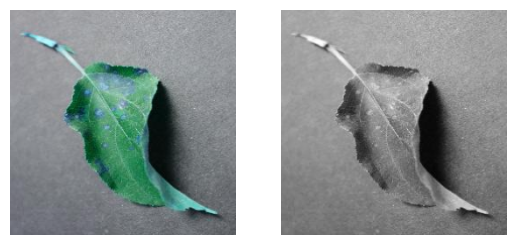

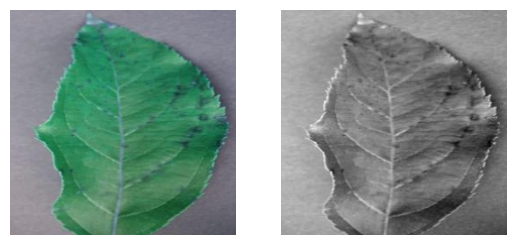

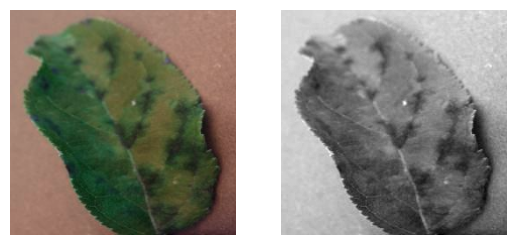

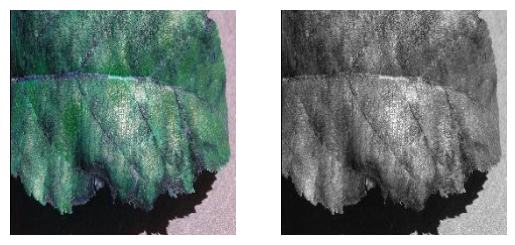

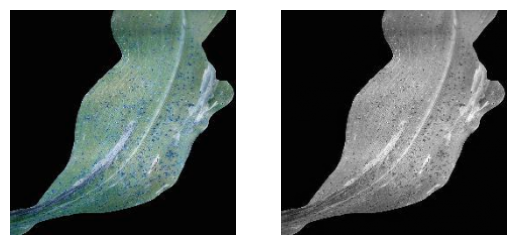

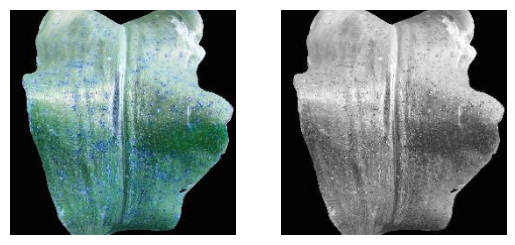

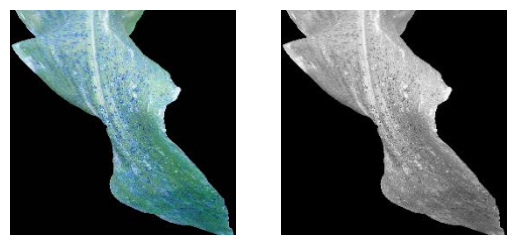

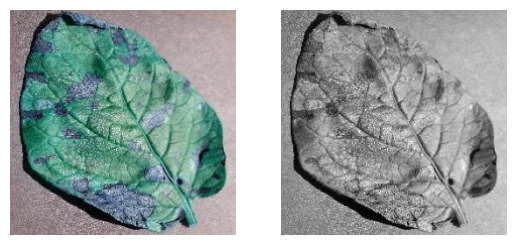

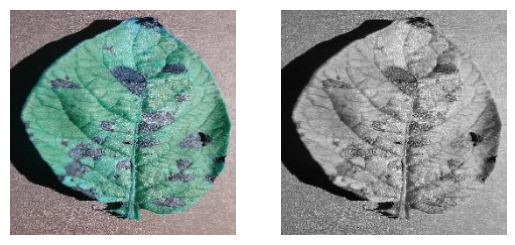

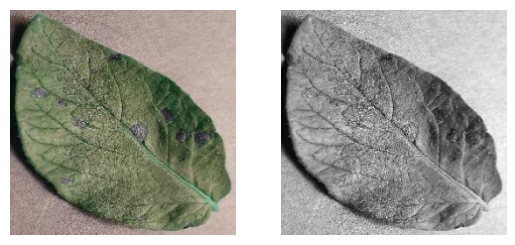

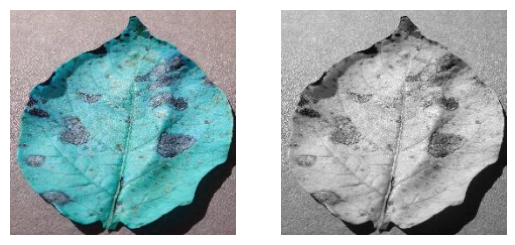

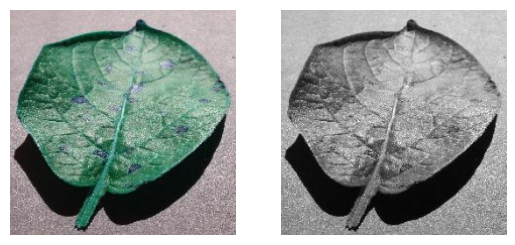

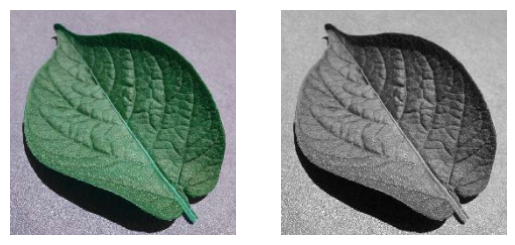

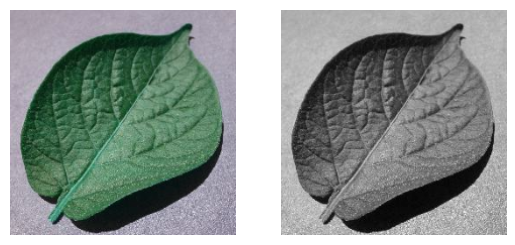

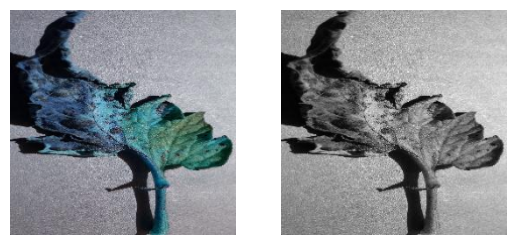

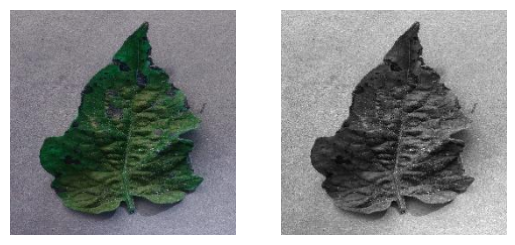

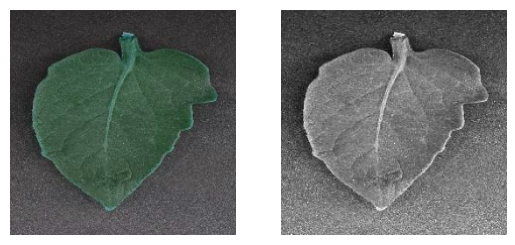

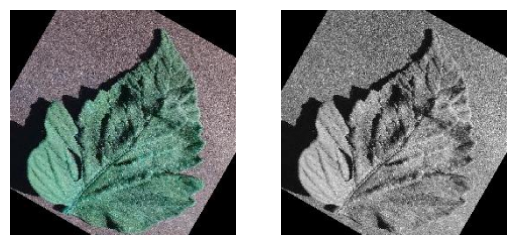

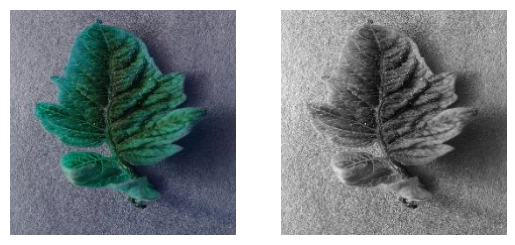

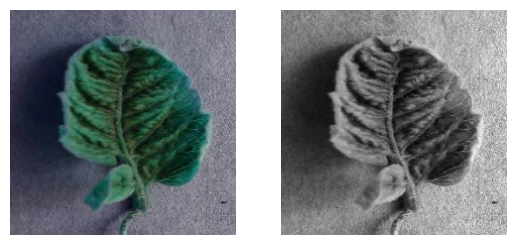

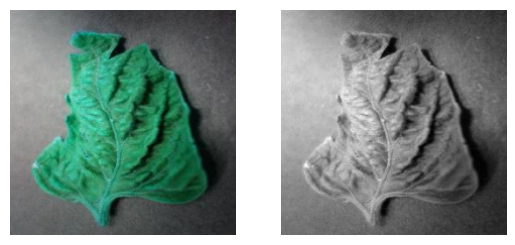

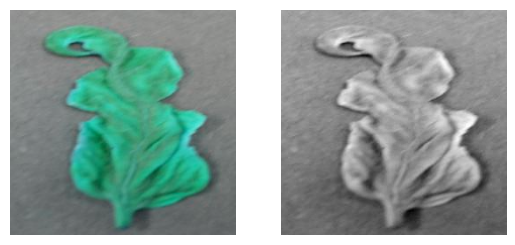

In [26]:
for image in test_images:
    visualize_gray(image)

#### 5.2 Chuẩn hóa và hiển thị phân phối giá trị của pixel

In [32]:
image = images[2]
zero_one_scaling, standardized = normalize(image)
normalization_methods = {
    'Original Image': image,
    'Min-Max Scaling [0,1]': zero_one_scaling,
    'Standard Scaling (Z-Score)': standardized,
}

plt.figure(figsize=(18, 3))

for i, (name, normalized_img) in enumerate(normalization_methods.items(), 1):
    plt.subplot(2, 5, i)
    # plt.imshow(normalized_img)
    plt.title(name)
    plt.axis('off')

    plt.subplot(2, 5, i+5)
    plt.hist(normalized_img.ravel(), bins=50)
    plt.title(f'{name} Distribution')

plt.tight_layout()
plt.show()

#### 5.3 Áp dụng các thuật toán tìm edge detection

In [33]:
visualize_edges(images[:9], "original.png")

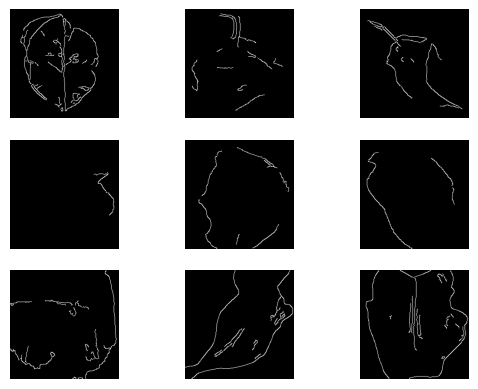

In [34]:
edge_images = [canny(image) for image in images[:9]]

visualize_edges(edge_images, "canny.png")

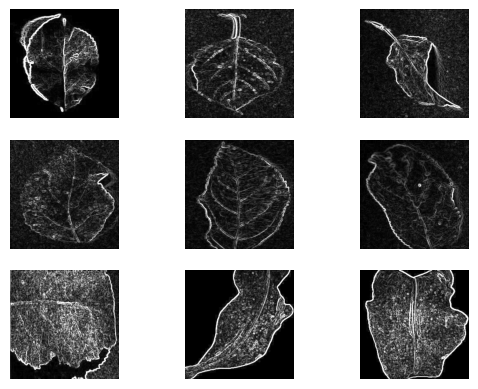

In [35]:
edge_images = [sobel(image) for image in images[:9]]

visualize_edges(edge_images, "sobel.png")

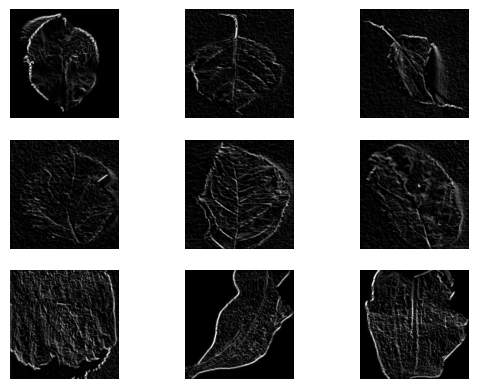

In [37]:
edge_images = [prewitt(image) for image in images[:9]]

visualize_edges(edge_images, "prewitt.png")